In [2]:
%reload_ext autoreload
%autoreload 2

import time
import json
import os
import shutil
import copy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

import utils as ut
import plot_utils as pu

First get the positions fo the main bodies. Here I use initial conditions for a Figure Eight orbit. here I use the class NBodySimulation (to be found in utils.py) to integrate the orbits. 

Period: 6.325897
Timestep: 0.010543161666666667
99.83%
Shape of positions array: (600, 2, 3)


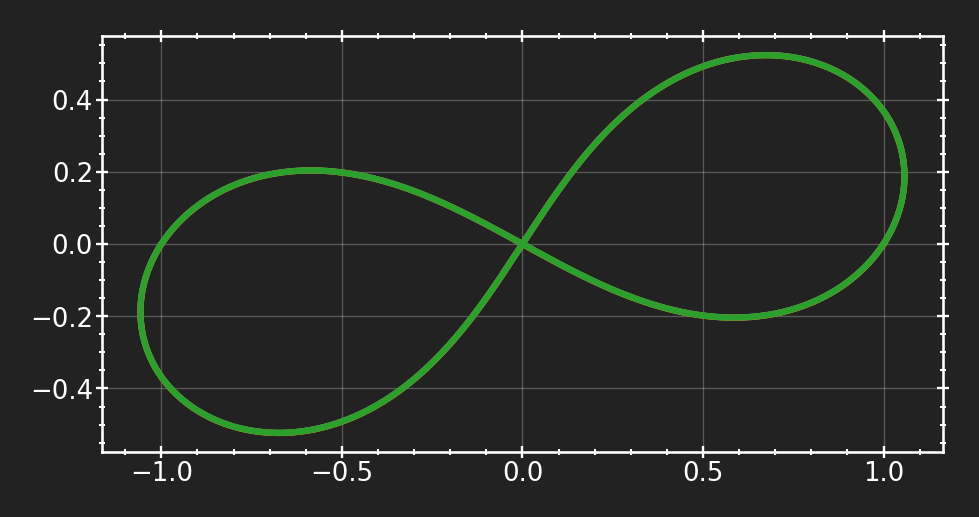

In [7]:
initial_conditions_file = '../data/periodic_3b_inits/inits.json'
with open(initial_conditions_file, 'r') as f:
    initial_conditions = json.load(f)

orbit = 'Figure Eight'
inits = initial_conditions[orbit]

T = inits['period']
masses = [inits[str(i)]['mass'] for i in range(3)]
bodies = [ut.Body(inits[str(i)]['mass'],
                  inits[str(i)]['pos'][:2],
                  inits[str(i)]['vel'][:2]) for i in range(3)]

FRAMES = 600
dt = T/FRAMES
print(f'Period: {T}')
print(f'Timestep: {dt}')

sim = ut.NBodySimulation(bodies, e=0.0)
sim.run_simulation(T, dt)
pos = sim.positions
print('\nShape of positions array: ' + str(pos.shape))

# Checking the orbit
sim.simple_plot()

Define the radii of the bodies, and the dimensions of the grid for the test particles

In [1]:
radii = np.array([1, 1, 1])*0.1

r = 1.5
N = 50  
M = 50

# Where to save the data
motherfold = f'../figures/figure_eight_{N}_{M}/'
save_ind_fold = motherfold + 'indices/'
save_alpha_fold = motherfold + 'time_hit/'
if not os.path.exists(save_ind_fold):
    os.makedirs(save_ind_fold)
if not os.path.exists(save_alpha_fold):
    os.makedirs(save_alpha_fold)

NameError: name 'np' is not defined

In [227]:




n_periods = 2
I = 600 * n_periods

for frame_start in range(0, 600):

    basin = ut.BasinFractal(masses, radii, pos)
    basin.set_grid(N, M, r, r)

    print(f'\rFrame Start: {frame_start} \n', end='')
    time_start = time.time()
    basin.run(dt, max_iters=I, frame_start=frame_start)
    time_end = time.time()
    print(f'\rTime: {time_end - time_start}\n', end='')

    hit_time = basin.hit_time.T[::-1, :]
    alpha = copy.deepcopy(hit_time)

    fact = 0.8

    alpha[alpha == -1] = np.max(alpha)*fact

    max_alpha = np.max(alpha)*fact
    alpha = alpha/max_alpha

    alpha = alpha**(1/2)
    alpha = np.clip(alpha, 0, 1)
    alpha=1-alpha
    alpha = np.clip(alpha, 0.5, 1)

    # Define your colors
    c0 = np.array([0, 0, 212]) / 255
    c1 = np.array([212, 0, 0]) / 255
    c2 = np.array([0, 212, 0]) / 255
    colors = [c0, c1, c2]

    # Create colormaps
    cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['white', color]) for color in colors]

    # Assuming 'indices' and 'alpha' are defined
    indices = basin.hit_indices.T[::-1, :]
    rgba_image = np.zeros((*indices.shape, 4))


    np.save(save_ind_fold + f'indices_{frame_start:04d}.npy', indices)
    np.save(save_alpha_fold + f'alpha_{frame_start:04d}.npy', hit_time)

    # Apply the colormaps
    for i, cmap in enumerate(cmaps):
        mask = indices == i
        rgba_image[mask] = cmap(alpha[mask])

    # Handle the case where indices value is -1
    mask = indices == -1
    rgba_image[mask] = [1, 1, 1, 1]  # Set to white; change if different behavior is desired


    # make mesh plot
    Fig = pu.Figure(fig_size=1403, grid=False, theme='default', sw=0, ratio=1)
    axes = Fig.axes_flat
    fs = Fig.fs
    fig = Fig.fig

    ax = axes[0]
    # no xticks nor yticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.margins(x=0, y=0)

    im = ax.imshow(rgba_image, extent=[-r, r, -r, r], zorder=0)

    colors_ = ['w'] + colors
    frame = frame_start
    circles = []
    for i in range(len(radii)):
        circle = patches.Circle((pos[frame, 0, i], pos[frame, 1, i]), radii[i], 
                                facecolor=colors_[i+1], 
                                edgecolor='k',
                                linewidth = fs*0.1,
                                fill=True)
        ax.add_patch(circle)
        circles.append(circle)

    filename = f'render_{frame_start:04d}.jpg'
    Fig.save(savefold+filename, bbox_inches='tight', pad_inches=0)

    for circle in circles:
        circle.remove()
    
    im.remove()

    plt.close()

    # delete basin
    del basin


Frame Start: 0 
Time: 71.76404356956482
Frame Start: 1 
Time: 73.423668384552
Frame Start: 2 
Time: 73.35102725028992
Frame Start: 3 
Time: 73.74221014976501
Frame Start: 4 
Time: 73.71797513961792
Frame Start: 5 
Time: 74.7676088809967
Frame Start: 6 
Time: 74.45561337471008
Frame Start: 7 
Time: 70.23483419418335
Frame Start: 8 
Time: 69.94046592712402
Frame Start: 9 
Time: 69.84327220916748
Frame Start: 10 
Time: 71.43852090835571
Frame Start: 11 
Time: 72.95450234413147
Frame Start: 12 
Time: 72.55269980430603
Frame Start: 13 
Time: 72.20059394836426
Frame Start: 14 
Time: 72.07538509368896
Frame Start: 15 
Time: 71.61072206497192
Frame Start: 16 
Time: 71.81457257270813
Frame Start: 17 
Time: 71.93194389343262
Frame Start: 18 
Time: 71.56485962867737
Frame Start: 19 
Time: 71.65543127059937
Frame Start: 20 
Time: 71.450998544693
Frame Start: 21 
Time: 71.27435064315796
Frame Start: 22 
Time: 71.37247157096863
Frame Start: 23 
Time: 71.41542148590088
Frame Start: 24 
Time: 69.94762

In [214]:
indices = basin.hit_indices

savefold = '../figures/basin_test/pngs/'

if not os.path.exists(savefold):
    os.makedirs(savefold)
else:
    # remove all files in folder
    for filename in os.listdir(savefold):
        file_path = os.path.join(savefold, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path): 
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))
        

Fig = pu.Figure(grid=False, ratio=1, theme='default')
axes = Fig.axes_flat
fs = Fig.fs

ax = axes[0]
#remove ticks
ax.set_xticks([])
ax.set_yticks([])

fact = 1.5
ax.set_xlim(-r*fact, r*fact)
ax.set_ylim(-r*fact, r*fact)

if all_hit:
    colors = ['lightcoral', 'darkturquoise', 'limegreen']  # Replace with your colors
else:
    colors = ['white', 'lightcoral', 'darkturquoise', 'limegreen']


colors_ = ['red', 'blue', 'green']

cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors)

im = ax.imshow(indices.T[::-1, :], cmap=cmap, extent=[-r, r, -r, r],
               vmin=-1, vmax=len(radii)-1, zorder=0, alpha=0.9)


tail_size = 40
lw = 0.2
for frame in range(1, 600):
    circles = []
    for i in range(len(radii)):
        j = i if all_hit else i+1
        circle = patches.Circle((pos[frame, 0, i], pos[frame, 1, i]), radii[i], 
                                facecolor=colors[j], 
                                edgecolor='k',
                                linewidth = fs*0.2,
                                fill=True, zorder=2)
        circles.append(circle)
        ax.add_patch(circle)

    plots = []
    frame0 = 0 if frame < tail_size else frame-tail_size 
    for i in range(basin.n):
        for j in range(basin.m):
            x = pos_arr[frame0:frame, i, j, 0]
            y = pos_arr[frame0:frame, i, j, 1]

            color = colors_[indices[i, j]] if np.isnan(x[-1]) else 'k'

            if not np.isnan(x[0]):
                plot = ax.plot(x, y, lw=lw*fs, color=color, zorder=1)
                plots.append(plot)
            
    filename = 'render_{:04d}.jpg'.format(frame)
    Fig.save(savefold+filename, bbox_inches='tight')

    for circle in circles:
        circle.remove()
    for plot in plots:
        plot[0].remove()

plt.close()

pu.png_to_gif(savefold, fps=40)

In [177]:
pu.png_to_gif(savefold, fps=40)

In [127]:
alpha = copy.deepcopy(basin.hit_time.T[::-1, :])

fact = 0.8

alpha[alpha == -1] = np.max(alpha)*fact

max_alpha = np.max(alpha)*fact
alpha = alpha/max_alpha

alpha = alpha**(1/2)
alpha = np.clip(alpha, 0, 1)
alpha=1-alpha
alpha = np.clip(alpha, 0.5, 1)

# Define your colors
c0 = np.array([0, 0, 212]) / 255
c1 = np.array([212, 0, 0]) / 255
c2 = np.array([0, 212, 0]) / 255
colors = [c0, c1, c2]

# Create colormaps
cmaps = [LinearSegmentedColormap.from_list("custom_cmap", ['white', color]) for color in colors]

# Assuming 'indices' and 'alpha' are defined
indices = basin.hit_indices.T[::-1, :]
rgba_image = np.zeros((*indices.shape, 4))

# Apply the colormaps
for i, cmap in enumerate(cmaps):
    mask = indices == i
    rgba_image[mask] = cmap(alpha[mask])

# Handle the case where indices value is -1
mask = indices == -1
rgba_image[mask] = [1, 1, 1, 1]  # Set to white; change if different behavior is desired


# make mesh plot
Fig = pu.Figure(grid=False)
axes = Fig.axes_flat
fs = Fig.fs

ax = axes[0]


im = ax.imshow(rgba_image, extent=[-r, r, -r, r], zorder=0)

colors_ = ['w'] + colors
frame = frame_start
for i in range(len(radii)):
    circle = patches.Circle((pos[frame, 0, i], pos[frame, 1, i]), radii[i], 
                            facecolor=colors_[i+1], 
                            edgecolor='k',
                            linewidth = fs*0.1,
                            fill=True)
    ax.add_patch(circle)

# plot colorbar
#cbar = plt.colorbar(im, ax=ax, shrink=0.8)

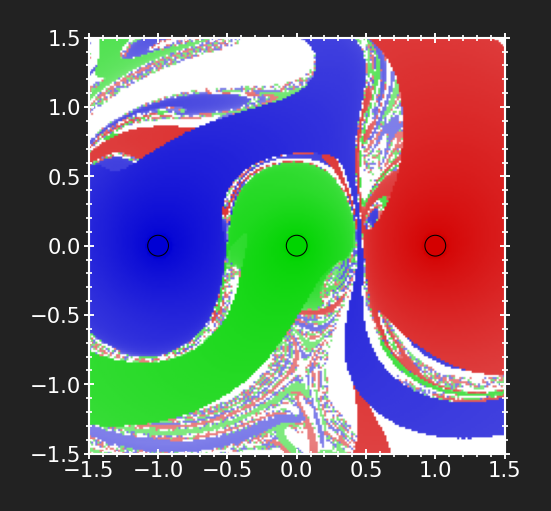

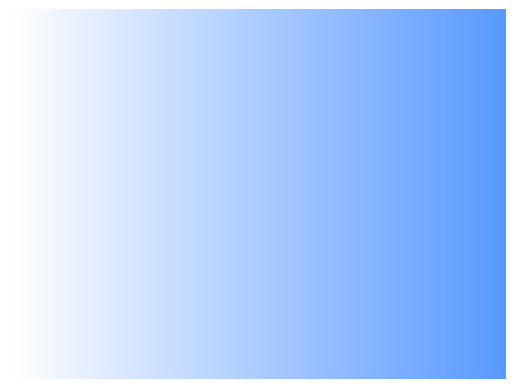

In [89]:


# Use this colormap for plotting
# Example usage with imshow:
# ax.imshow(data, cmap=custom_cmap)

# To test the colormap, you can plot it
plt.imshow([np.linspace(0, 1, 256)], aspect='auto', cmap=cmaps[0])
plt.axis('off')
plt.show()